# Imports

In [14]:
import pandas as pd
import numpy as np
!pip install spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stop_words
import os
import regex as re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

You should consider upgrading via the 'C:\Users\DELL\anaconda6\python.exe -m pip install --upgrade pip' command.


In [15]:
!pip install contractions
import contractions
import unicodedata
!pip install langdetect
from langdetect import detect
import matplotlib.pyplot as plt # data visualization library
%matplotlib inline
import seaborn as sns

You should consider upgrading via the 'C:\Users\DELL\anaconda6\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\DELL\anaconda6\python.exe -m pip install --upgrade pip' command.


In [16]:
import gensim
import gensim.corpora as corpora
#Remove stemming(snowball stemming) add lemmatistaion using simple_process from gensim 
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report


# Reading the data into df

In [17]:
#Reading the excel into data frame
df = pd.read_excel('Data file.xlsx')
df

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,_x000D_\n_x000D_\nreceived from: avglmrts.vhqm...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


# To Check unique Assignment Group

In [18]:
#checking number of assignment groups
df['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

There are total 74 groups

Assignment Group Percentage

In [19]:
df_inc = df['Assignment group'].value_counts().reset_index()
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_inc.head()

,index,Assignment group,percentage
0,GRP_0,3976,46.776471
1,GRP_8,661,7.776471
2,GRP_24,289,3.400000
3,GRP_12,257,3.023529
4,GRP_9,252,2.964706


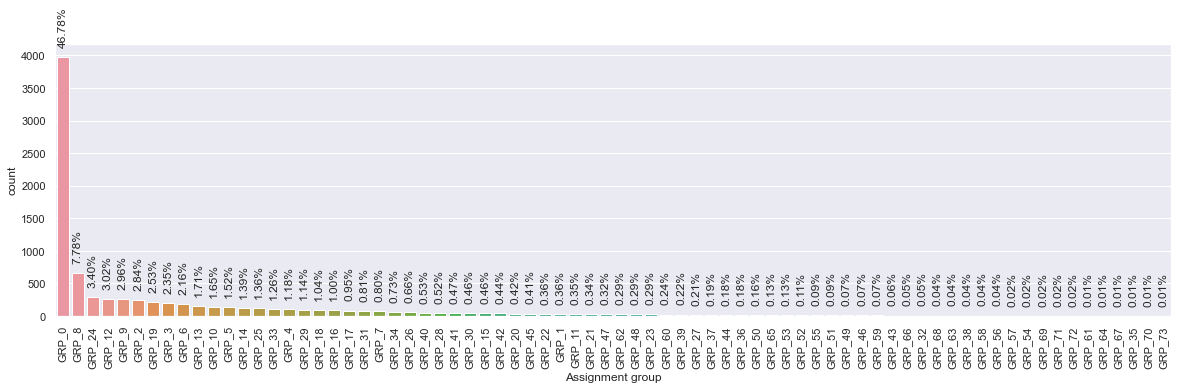

In [20]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="darkgrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=df, order=df["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(df.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')
#augmentation

Checking the most repeated top 10 groups

In [21]:
df_top_10 = df['Assignment group'].value_counts().nlargest(10).reset_index()
df_top_10

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
5,GRP_2,241
6,GRP_19,215
7,GRP_3,200
8,GRP_6,184
9,GRP_13,145


Checking the last 10 assignment groups

In [22]:
df_bottom_10 = df['Assignment group'].value_counts().nsmallest(10).reset_index()
df_bottom_10

,index,Assignment group
0,GRP_61,1
1,GRP_64,1
2,GRP_67,1
3,GRP_35,1
4,GRP_70,1
5,GRP_73,1
6,GRP_57,2
7,GRP_54,2
8,GRP_69,2
9,GRP_71,2


Checking the distirbution

In [23]:
df_bins = pd.DataFrame(columns=['Description','Ticket Count'])
_1_50_ticket = {'Description':' 1-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}
#append row to the dataframe
df_bins = df_bins.append([_1_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins


,Description,Ticket Count
0,1-50 ticket,44
1,51-100 ticket,9
2,>100 ticket,15


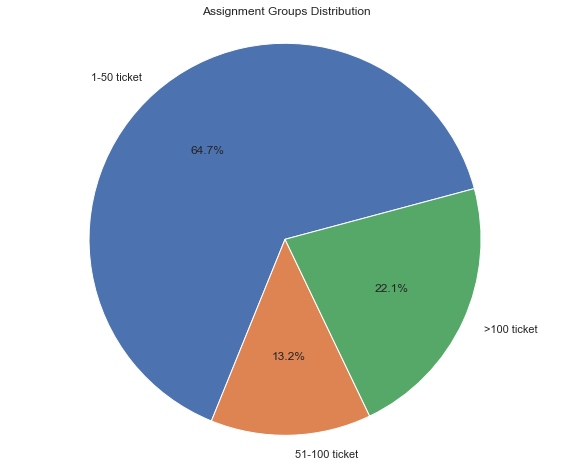

In [24]:
plt.figure(figsize=(10, 8))
plt.pie(df_bins['Ticket Count'],labels=df_bins['Description'],autopct='%1.1f%%', startangle=15);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

In [25]:
#checking the null values
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [26]:
#Checking the value of null
df[df['Description'].isnull()]

,Short description,Description,Caller,Assignment group
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [27]:
#Replacing the null value with the short description value
df=df.replace({'Description':np.NaN},df[df['Short description']=='i am locked out of skype']['Short description'].to_string().split(maxsplit=1)[1])

In [28]:
#Checking if the value is actually replaced or not
df.iloc[4395]

Short description    i am locked out of skype
Description          i am locked out of skype
Caller                      viyglzfo ajtfzpkb
Assignment group                        GRP_0
Name: 4395, dtype: object

In [29]:
#Checking for the null values
df.isnull().sum()

Short description    8
Description          0
Caller               0
Assignment group     0
dtype: int64

Since we are mostly concerend with the description letting the short description null values be for  a moment

In [30]:
feature_df = df.filter(['Description','Assignment group'], axis=1)

In [31]:
#caluclating the word count
feature_df['word_count']=df['Description'].apply(lambda x:len(str(x).split()))
#printing 5 sample values
feature_df.sample(15)

,Description,Assignment group,word_count
7410,_x000D_\n_x000D_\nreceived from: qnzmjxsl.logs...,GRP_0,17
4634,unable to connect to vpn,GRP_0,5
4895,_x000D_\n_x000D_\nreceived from: xvwchsdg.plad...,GRP_0,54
1154,reset password,GRP_12,2
6396,_x000D_\n_x000D_\nreceived from: iygsxftl.hysr...,GRP_0,70
5080,need ability to create skype meetings through ...,GRP_0,8
7962,received from: monitoring_tool@company.com_x00...,GRP_8,12
752,my pc is responding slow. can the pc team plea...,GRP_0,35
2546,received from: monitoring_tool@company.com_x00...,GRP_8,12
883,received from: monitoring_tool@company.com_x00...,GRP_9,12


In [32]:
# Displaying the row with Maximum word counts
feature_df[feature_df['word_count']==feature_df['word_count'].max()]


,Description,Assignment group,word_count
7345,we are seeing activity indicating the host at ...,GRP_2,1657


In [33]:
# Dispalying rows with minimum word count
feature_df[feature_df['word_count']==feature_df['word_count'].min()]

,Description,Assignment group,word_count
276,outlookæ”¶åˆ°ç®±ä¸­folderå˜ä¸ºæ¯å¤©ä¸€ä¸ªfol...,GRP_30,1
415,complete,GRP_17,1
416,completed,GRP_0,1
608,funktionsstÃ¶rung,GRP_33,1
618,æ‰“å¼€outlookæ—¶ï¼Œæ˜¾ç¤ºoutlook.ostæ–‡ä»¶é”™è...,GRP_0,1
...,...,...,...
8059,the,GRP_17,1
8092,the,GRP_17,1
8093,the,GRP_17,1
8168,the,GRP_17,1


In [34]:
#Method to caluclate no of characters available in sentence
def char_counts(x):
  s=x.split()
  x=''.join(s)
  return len(x)


In [35]:
feature_df['char_counts']=df['Description'].apply(lambda x: char_counts(str(x)))
#printing 5 random samples
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts
5506,dsw in33568505_x000D_\n_x000D_\nwe are seeing ...,GRP_2,236,1331
1903,name:vithrkas \nlanguage:\nbrowser:microsoft i...,GRP_0,14,139
3513,password reset,GRP_0,2,13
4133,unable to login to engineering tool,GRP_0,6,30
4447,unable to print. need a driver update.,GRP_0,7,32


In [36]:
#Checking the minimum character count
feature_df['char_counts'].min()

1

In [37]:
#Checking the maximum character count
feature_df['char_counts'].max()

12785

In [38]:
#Caluclating the average word count
feature_df['Avg_word_Count']=feature_df['word_count']/feature_df['char_counts']
#printing 5 random samples
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count
1770,momitor defekt \niptbwdq csenjruz,GRP_24,4,30,0.133333
2130,unable to login to erp and distributor_tool,GRP_0,7,37,0.189189
5163,engineering request 2248675 assignment (revise...,GRP_11,16,101,0.158416
4624,\n\nreceived from: gvderpbx.udrzjxkm@gmail.com...,GRP_0,10,149,0.067114
5786,"ic_x000D_\n welcome, our next available agent ...",GRP_0,24,195,0.123077


In [39]:
#Checking the minimum avg word count
print("Minimum avg word count",feature_df['Avg_word_Count'].min())
print("Maximum avg word count",feature_df['Avg_word_Count'].max())

Minimum avg word count 0.009900990099009901
Maximum avg word count 1.0


In [40]:
import json
import re
import string
import nltk
#from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from string import punctuation
#from wordcloud import WordCloud
#from wordcloud import WordCloud, STOPWORDS

In [41]:
print(stop_words)
len(stop_words)

{'whose', '’m', 'sometime', 'under', 'always', 'two', 'even', 'say', 'whatever', 'this', 'being', 'then', 'behind', 'with', 'before', 'any', 'further', 'yours', 'were', 'have', 'until', 'onto', 'namely', 'had', 'again', 'that', 'part', 'together', 'thus', 'wherever', 'beside', 'of', 'four', 'thereafter', 'within', 'enough', 'at', 'anyway', 'everyone', 'here', 'few', 'been', 'wherein', 'an', 'too', 'some', 'much', 'ten', 'she', 'several', 'former', 'get', 'myself', 'sometimes', 'may', 'someone', 'next', 'or', 'therefore', 'toward', 'whither', 're', 'name', 'three', 'nobody', 'whereupon', 'go', 'anyhow', 'than', 'last', 'along', 'somehow', 'fifty', 'into', 'will', 'up', 'to', 'please', 'seeming', 'nowhere', 'hundred', 'amongst', '’d', 'among', 'can', 'i', 'done', 'over', 'seems', 'more', 'are', "n't", 'about', 'various', 'your', "'m", 'almost', 'back', 'call', 'six', 'latter', 'see', 'keep', 'many', 'if', 'anywhere', 'during', 'we', 'one', 'across', 'rather', 'seemed', 'very', 'either', 

326

In [42]:
#caluclating the number of stop words in description column
feature_df['stop_words_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t in stop_words]))
#printing the sample values
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count
8073,setup new ws \wyighrjl xcwavhyu,GRP_24,5,27,0.185185,0
3284,node ldiw8511217sf located at usa village is d...,GRP_8,12,62,0.193548,4
5398,outlook email font size issue,GRP_0,5,25,0.200000,0
839,axcbfuqo yiagubvh no longer has access to http...,GRP_25,100,458,0.218341,56
6909,received from: monitoring_tool@company.com_x00...,GRP_6,12,108,0.111111,1


In [43]:
#caluclating the minimum number of stop words count
print("Minimum number of stop words present",feature_df['stop_words_count'].min())
#caluclating the maximum number of stop words count
print("Maximum number of stop words present", feature_df['stop_words_count'].max())

Minimum number of stop words present 0
Maximum number of stop words present 352


In [44]:
#caluclating the number of digits count in description column
feature_df['Digits_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))
#Printing the sample rows
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count,Digits_count
3858,erp net weaver funktioniert nicht. pc: empw700...,GRP_0,7,44,0.159091,0,0
4024,HostName_894 : volume: c:\ label:sys-HostName_...,GRP_39,15,95,0.157895,2,0
5159,user having issues login in to the pc with the...,GRP_0,56,292,0.191781,23,0
6115,"from: proygkjt mwetuhqf \nsent: sunday, august...",GRP_0,162,987,0.164134,53,6
4886,source ip :83.54.03.93209 \nsystem name :rgtw8...,GRP_3,246,1582,0.155499,82,3


In [45]:
s = feature_df['Digits_count'].groupby(feature_df['Assignment group']).value_counts()

In [46]:
#Checking the maximum count
print("Maximum number of digits present",feature_df['Digits_count'].max())
#Checking the minimum count
print("Minimum number of digits present",feature_df['Digits_count'].min())


Maximum number of digits present 444
Minimum number of digits present 0


In [47]:
#caluclating the number of uppercase count in description column
feature_df['Upper_Case_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t.isupper()]))
#printing the sample
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count,Digits_count,Upper_Case_count
3992,outlook is not working . i've updated the sp 2...,GRP_0,13,49,0.265306,5,1,0
4978,the,GRP_17,1,3,0.333333,1,0,0
6537,ms excel file not opening -error procted view ...,GRP_0,36,225,0.160000,10,0,0
996,account unlock,GRP_0,2,13,0.153846,0,0,0
2900,msoffice 2016 installation,GRP_0,3,24,0.125000,0,1,0


In [48]:
#Checking the maximum count
print("Maximum number of Upper case letters present",feature_df['Upper_Case_count'].max())
#Checking the minimum count
print("Minimum number of Upper case letters present",feature_df['Upper_Case_count'].min())

Maximum number of Upper case letters present 10
Minimum number of Upper case letters present 0


# Cleaning and PreProcessing

In [49]:
df.sample(5)

,Short description,Description,Caller,Assignment group
7271,windows disk space utilization alert for :: H...,windows disk space utilization alert for :: H...,uxgrdjfc kqxdjeov,GRP_12
5378,new order,from: jmfvwrek pqwehmzgagannathan _x000D_\nsen...,jmfvwrek pqwehmzg,GRP_26
817,password update query,password update query,gdnwlkit jokidavy,GRP_0
3799,clients laptop crashed and will not boot,clients laptop crashed and will not boot,onvpjxei uiolhpjq,GRP_3
7439,ç­”å¤: help for mm#4866474 24800776,_x000D_\n_x000D_\nreceived from: windy.shi@com...,tycludks cjofwigv,GRP_6




1.   The objective of the problem is to categorise the issues based on description and assign them to various groups. Since the short description is extracted from the description only, we can remove the column.
2.  The objective is also to analyse the description and assign tickets


In [50]:
def fn_lan_detect(df):                                        
   try:                                                          
     0 
     return detect(df)                                      
   except:                                                       
      return 'no'                                                  

df['language'] = df['Description'].apply(fn_lan_detect)

In [51]:
df['language'].value_counts()

en    7001
de     404
af     263
it     145
fr     121
sv      76
no      70
da      70
nl      66
ca      64
es      55
pl      29
pt      28
ro      16
so      16
sl      12
sq      12
tl      11
cy      10
hr       6
tr       5
fi       5
id       5
et       5
sk       2
lt       2
cs       1
Name: language, dtype: int64

In [52]:
import googletrans
from googletrans import Translator
print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [53]:
#pip install googletrans

In [57]:
#df['RawDescription'] = df['Short description'].str.cat(df['Description'], sep=' ', na_rep=' ')
df['RawDescription'] = df['Description']
#df.head()

In [58]:
# Function to translate the text to english.
def fn_translate(df,lang):
  try:
    if lang == 'en':
        return df
    else:
        return translator.translate(df).text
  except:
    return df
    
    
df['English_Description'] = df.apply(lambda x: fn_translate(x['RawDescription'], x['language']), axis=1)

In [59]:
df.sample(5)

,Short description,Description,Caller,Assignment group,language,RawDescription,English_Description
7201,erp SID_34 account unlock,erp SID_34 account unlock,lwbchnga axpqctfr,GRP_0,ro,erp SID_34 account unlock,erp SID_34 account unlock
2464,kicked off of vpn,i was kicked off of vpn for the 3rd time today...,gakceqyb edrjthvo,GRP_0,en,i was kicked off of vpn for the 3rd time today...,i was kicked off of vpn for the 3rd time today...
1405,unable to login to hub to check pay statements,unable to login to hub to check pay statements,wrdmxloh dshplynj,GRP_0,en,unable to login to hub to check pay statements,unable to login to hub to check pay statements
388,reset users password,reset users password,qcehailo wqynckxg,GRP_0,af,reset users password,reset users password
1448,a next issue to bobj account dbednyuarski,_x000D_\n_x000D_\nreceived from: pgacouel.mpgf...,pgacouel mpgfkxwr,GRP_9,en,_x000D_\n_x000D_\nreceived from: pgacouel.mpgf...,_x000D_\n_x000D_\nreceived from: pgacouel.mpgf...


In [60]:
#df.to_csv('check_translatea.csv', index=False, encoding='utf_8_sig')

In [61]:
df_t = df[(df['English_Description'].str.contains('received from: monitoring_tool@company.com') == True)]

In [62]:
df_t.shape

(961, 7)

In [63]:
df_e = df[(df['English_Description'].str.contains('event') == True)]

In [64]:
df_e.shape

(89, 7)

In [65]:
df_e

,Short description,Description,Caller,Assignment group,language,RawDescription,English_Description
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,en,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...
84,engineering tool drawing originals in pdf form...,"hello it service,_x000D_\ni need to monitor th...",vlymsnej whlqxcst,GRP_11,en,"hello it service,_x000D_\ni need to monitor th...","hello it service,_x000D_\ni need to monitor th..."
341,security incidents - ( #in33071122 ) :[ipbl]: ...,source ip :\nsystem name :lmsl9516338\nuser n...,gzhapcld fdigznbk,GRP_3,en,source ip :\nsystem name :lmsl9516338\nuser n...,source ip :\nsystem name :lmsl9516338\nuser n...
537,us time change,\n\nreceived from: xabkyoug.wdkyiqfx@gmail.com...,xabkyoug wdkyiqfx,GRP_0,en,\n\nreceived from: xabkyoug.wdkyiqfx@gmail.com...,\n\nreceived from: xabkyoug.wdkyiqfx@gmail.com...
874,bex analyzer report not working,i open bex analyzer and connect to SID_37_x000...,wgothrzl iokdftgn,GRP_0,en,i open bex analyzer and connect to SID_37_x000...,i open bex analyzer and connect to SID_37_x000...
...,...,...,...,...,...,...,...
7997,security incidents - ( sw #in33544563 ) : poss...,source ip : 45.25.35.0499\nsystem name : lpal9...,ugyothfz ugrmkdhx,GRP_2,en,source ip : 45.25.35.0499\nsystem name : lpal9...,source ip : 45.25.35.0499\nsystem name : lpal9...
8002,security incidents - ( sw #in33544563 ) : poss...,source ip : 45.25.35.0499_x000D_\nsystem name ...,ugyothfz ugrmkdhx,GRP_62,en,source ip : 45.25.35.0499_x000D_\nsystem name ...,source ip : 45.25.35.0499_x000D_\nsystem name ...
8096,lean event,_x000D_\n_x000D_\nreceived from: ikerxqwz.prky...,ikerxqwz prkyuitl,GRP_0,en,_x000D_\n_x000D_\nreceived from: ikerxqwz.prky...,_x000D_\n_x000D_\nreceived from: ikerxqwz.prky...
8336,hello. please see the highlighted field below...,from: rushethryli h jacfgtykson [mailto:ckflmq...,ckflmqoj fojkrlmw,GRP_29,en,from: rushethryli h jacfgtykson [mailto:ckflmq...,from: rushethryli h jacfgtykson [mailto:ckflmq...


In [66]:
s = df_t['Caller'].groupby(df_t['Assignment group']).value_counts()

In [67]:
s

Assignment group  Caller           
GRP_1             bpctwhsn kzqsbmtp      6
                  ZkBogxib QsEJzdZO      1
GRP_10            bpctwhsn kzqsbmtp     60
                  ZkBogxib QsEJzdZO      2
GRP_12            bpctwhsn kzqsbmtp      8
GRP_13            bpctwhsn kzqsbmtp      4
GRP_14            ZkBogxib QsEJzdZO      2
                  bpctwhsn kzqsbmtp      1
GRP_18            bpctwhsn kzqsbmtp      3
GRP_29            ZkBogxib QsEJzdZO      2
                  bpctwhsn kzqsbmtp      1
GRP_44            bpctwhsn kzqsbmtp      1
GRP_45            bpctwhsn kzqsbmtp      7
GRP_47            ZkBogxib QsEJzdZO      8
                  bpctwhsn kzqsbmtp      2
GRP_5             bpctwhsn kzqsbmtp     96
                  ZkBogxib QsEJzdZO     16
GRP_57            bpctwhsn kzqsbmtp      1
GRP_6             bpctwhsn kzqsbmtp     89
                  ZkBogxib QsEJzdZO     35
GRP_60            bpctwhsn kzqsbmtp     16
GRP_8             bpctwhsn kzqsbmtp    362
                  

In [68]:
df = df[(df['English_Description'].str.contains('received from: monitoring_tool@company.com') == False)]

In [69]:
df = df[(df['English_Description'].str.contains('event') == False)]

In [70]:
#df = df.replace(to_replace = "'", value="")

In [71]:
#dfk = df_bk['English_Description'].replace(to_replace = "'", value="")

In [72]:
#dfk1 = df[df['English_Description'].str.contains("laptop'") == True]

In [73]:
#a_string = df[(df['English_Description'].str.contains("'") == True)]
#stripped_string = a_string.strip("'") 

#print(stripped_string)  #Output: ab"cd

#replaced_string = a_string.replace("'","")  
#print(replaced_string) #Output: abcd
#a_string.sample(5)
#a_string.shape

In [74]:
#a_string.to_csv('string.csv', index=False, encoding='utf_8_sig')

In [75]:
#replaced_string.head

In [76]:
#dfk1 = replaced_string[replaced_string['English_Description'].str.contains("laptop'") == True]

In [77]:
#dfk1

In [78]:
#dfk2 = dfk1.replace(to_replace = "'", value="")
#dfk2

In [79]:
#df = df[(df['English_Description'].str.contains("'") == False)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7450 entries, 0 to 8499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Short description    7442 non-null   object
 1   Description          7450 non-null   object
 2   Caller               7450 non-null   object
 3   Assignment group     7450 non-null   object
 4   language             7450 non-null   object
 5   RawDescription       7450 non-null   object
 6   English_Description  7450 non-null   object
dtypes: object(7)
memory usage: 465.6+ KB


In [80]:
df['RawWordCount'] = [len(desc.split(' ')) for desc in df['English_Description']]
df.head()
wordCount_before = df['RawWordCount'].sum()

In [81]:
print("Total Corpus Word Count: ", wordCount_before)

Total Corpus Word Count:  201389


In [82]:
def removeString(data, regex):
    return data.str.lower().str.replace(regex.lower(), ' ')

def cleanDataset(dataset, columnsToClean, regexList):
    for column in columnsToClean:
        for regex in regexList:
            dataset[column] = removeString(dataset[column], regex)
    return dataset
# TBD : remove Disclaimer

def getRegexList():
    '''
    Adding regex list as per the given data set to flush off the unnecessary text
    
    '''
    regexList = []
    regexList += ['From:(.*)\r\n']  # from line
    regexList += ['Sent:(.*)\r\n']  # sent to line
    regexList += ['received from:(.*)\r\n']  # received data line
    regexList += ['received']  # received data line
    regexList += ['To:(.*)\r\n']  # to line
    regexList += ['CC:(.*)\r\n']  # cc line
    regexList += ['(.*)infection']  # footer
    regexList += ['\[cid:(.*)]']  # images cid
    regexList += ['https?:[^\]\n\r]+']  # https & http
    regexList += ['Subject:']
    regexList += ['[\w\d\-\_\.]+@[\w\d\-\_\.]+']  # emails are not required
    regexList += ['[0-9][\-0–90-9 ]+']  # phones are not required
    regexList += ['[0-9]']  # numbers not needed
    regexList += ['[^a-zA-z 0-9]+']  # anything that is not a letter
    regexList += ['[\r\n]']  # \r\n
    regexList += [' [a-zA-Z] ']  # single letters makes no sense
    regexList += [' [a-zA-Z][a-zA-Z] ']  # two-letter words makes no sense
    regexList += ["  "]  # double spaces
    
    regexList += ['^[_a-z0-9-]+(\.[_a-z0-9-]+)*@[a-z0-9-]+(\.[a-z0-9-]+)*(\.[a-z]{2,4})$']
    regexList += ['[\w\d\-\_\.]+ @ [\w\d\-\_\.]+']
    regexList += ['Subject:']
    regexList += ['[^a-zA-Z]']

    return regexList



In [83]:
#clean_tickets_df.sample(5)

Droping down the column Description and language after translating

In [84]:
df_translated_text= df.drop(['Description','language'],axis=1)

In [85]:
df_translated_text.English_Description=df_translated_text.English_Description.astype(str)

In [86]:
#Removing unwanted charcters
df_translated_text['English_Description']=df_translated_text['English_Description'].apply(lambda x: re.sub(r'[^\w ]+', "", x))
#Printing sample values
df_translated_text.sample(5)

,Short description,Caller,Assignment group,RawDescription,English_Description,RawWordCount
6539,user unable to hotel wi-fi,sgheqbly mcboawld,GRP_0,user unable to hotel wi-fi _x000D_\n-advised t...,user unable to hotel wifi _x000D_advised the u...,37
7290,pls help to change the internal order number 7...,ckitashy dnqojbwi,GRP_10,we jsut had a new company marocm apac cost cne...,we jsut had a new company marocm apac cost cne...,29
4966,sync hr org details to purchasing,mpihysnw wrctgoan,GRP_29,sync hr org details to purchasing for dhmfuvgw...,sync hr org details to purchasing for dhmfuvgw...,26
7064,virus detected on pc,nrugzxkl lohqkvry,GRP_50,virus detected on pc. please see attachment.,virus detected on pc please see attachment,7
3139,crm,hmjdrvpb komuaywn,GRP_15,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,_x000D__x000D_received from hmjdrvpbkomuaywngm...,136


In [87]:
def Expansions(x):
  expanded_text=[]
  expanded_words=[]
  for x in x.split():
    expanded_words.append(contractions.fix(x))
    expanded_text = ' '.join(expanded_words)
  return(expanded_text)


In [88]:
df_translated_text['Expansions']=df_translated_text['English_Description'].apply(lambda x:Expansions(str(x)))
#Printing the sample values
df_translated_text.sample(5)

,Short description,Caller,Assignment group,RawDescription,English_Description,RawWordCount,Expansions
1644,laptop byclpwmv esafrtbh defekt,sxabotdw xlozwcyk,GRP_33,laptop byclpwmv esafrtbh defekt,laptop byclpwmv esafrtbh defekt,4,laptop byclpwmv esafrtbh defekt
2632,engineering_tool issue,vnetbgio lqxztben,GRP_0,engineering_tool issue._x000D_\n-connected to ...,engineering_tool issue_x000D_connected to the ...,17,engineering_tool issue_x000D_connected to the ...
3871,please check order# 35042103 - voucher v-00011418,hbmwlprq ilfvyodx,GRP_13,"the order header is showing this voucher code,...",the order header is showing this voucher code ...,62,the order header is showing this voucher code ...
7858,dell 7350: pc boot up failure.urgent,qwreamdz pmarxvtk,GRP_3,dell 7350: pc boot up failure.\n-had to try r...,dell 7350 pc boot up failurehad to try restar...,42,dell 7350 pc boot up failurehad to try restart...
1616,vpn shut down,hdfcwmag plxstkad,GRP_0,"while searching for quotes in erp, vpn shut do...",while searching for quotes in erp vpn shut dow...,35,while searching for quotes in erp vpn shut dow...


In [89]:
  
df_translated_text['Description_Removed_StopWords']=df_translated_text['Expansions'].apply(lambda t:' '.join([t for t in t.split() if t not in stop_words]))
#Checking for sample rows
df_translated_text.sample(5)


,Short description,Caller,Assignment group,RawDescription,English_Description,RawWordCount,Expansions,Description_Removed_StopWords
7840,business_client issue,ewylacup jlibymtw,GRP_14,1.) search material code are unavailable that ...,1 search material code are unavailable that se...,13,1 search material code are unavailable that se...,1 search material code unavailable seraching r...
286,vitalyst transfer: crm installation,anpocezt qturbxsg,GRP_0,vitalyst transfer: crm installation,vitalyst transfer crm installation,5,vitalyst transfer crm installation,vitalyst transfer crm installation
6355,support fÃ¼r umbau \ we22 \ port 22 \niptbwdq ...,niptbwdq csenjruz,GRP_24,support fÃ¼r umbau \ we22 \ port 22 \niptbwdq ...,support fÃ¼r umbau we22 port 22 niptbwdq cse...,10,support fÃ¼r umbau we22 port 22 niptbwdq csenjruz,support fÃ¼r umbau we22 port 22 niptbwdq csenjruz
846,crm access issue,utrvshcp bjlwcovt,GRP_0,"hi, poland cannot log into crm. all users in p...",hi poland cannot log into crm all users in poland,10,hi poland cannot log into crm all users in poland,hi poland log crm users poland
5096,internet explorer update to version11,orjszque lukegwam,GRP_19,internet explorer update to version11,internet explorer update to version11,5,internet explorer update to version11,internet explorer update version11


In [90]:
#Removing Multiple spaces
df_translated_text['Expansions']=df_translated_text['Expansions'].apply(lambda x: ' '.join(x.split()))
#Printing sample values
df_translated_text.sample(5)

,Short description,Caller,Assignment group,RawDescription,English_Description,RawWordCount,Expansions,Description_Removed_StopWords
8431,laptop key bankrd not working,ivohcdpw ixcanwbm,GRP_19,_x000D_\n_x000D_\nreceived from: ivohcdpw.ixca...,_x000D__x000D_received from ivohcdpwixcanwbmgm...,32,_x000D__x000D_received from ivohcdpwixcanwbmgm...,_x000D__x000D_received ivohcdpwixcanwbmgmailco...
2776,windows account lock out issue,htsnaodb adjtmlzn,GRP_0,windows account lock out issue,windows account lock out issue,6,windows account lock out issue,windows account lock issue
2047,excel keeps exiting,qpkbiwzl urypnjvq,GRP_0,excel keeps exiting,excel keeps exiting,3,excel keeps exiting,excel keeps exiting
4120,cannot submit engineering_tool to system,hbodpniz jvqpxohl,GRP_0,when trying submit engineering_tool to system ...,when trying submit engineering_tool to system ...,34,when trying submit engineering_tool to system ...,trying submit engineering_tool system problem ...
2508,internet is down,lwgytuxq qspdztiw,GRP_4,lwgytuxq qspdztiw called in for an issue where...,lwgytuxq qspdztiw called in for an issue where...,28,lwgytuxq qspdztiw called in for an issue where...,lwgytuxq qspdztiw called issue internet comple...


In [91]:
def remove_accented_chars(x):
  x=unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
  return x

In [92]:
df_translated_text['Expansions']=df_translated_text['Expansions'].apply(lambda x:remove_accented_chars(x))
#Printing sample values
df_translated_text.sample(15)

,Short description,Caller,Assignment group,RawDescription,English_Description,RawWordCount,Expansions,Description_Removed_StopWords
1846,vpn,dhraxivp enmfvuqb,GRP_0,vpn : vpn is working.,vpn vpn is working,5,vpn vpn is working,vpn vpn working
2832,ordnerfreigabe fÃ¼r m: kvp3,nemzycxb xpsgkahw,GRP_34,ordnerfreigabe fÃ¼r m: kvp3,ordnerfreigabe fÃ¼r m kvp3,4,ordnerfreigabe fA14r m kvp3,ordnerfreigabe fÃ¼r m kvp3
2196,account locked in ad,lasxwmhr ixqclfaz,GRP_0,account locked in ad,account locked in ad,4,account locked in ad,account locked ad
3007,win8.1 ç³»ç»Ÿæç¤ºæ›´æ–°åŽï¼Œæ‰€æœ‰åº”ç”¨è½¯...,bxtdalsj rnkvcshb,GRP_31,win8.1 ç³»ç»Ÿæç¤ºæ›´æ–°åŽï¼Œæ‰€æœ‰åº”ç”¨è½¯...,win81 ç³çŸæçºææåŽï¼Œææœåºçè½äéƒ½äèƒ½æå¼ã,2,win81 c3cYcoaZi14aoce12ae12ae12a14a,win81 ç³çŸæçºææåŽï¼Œææœåºçè½äéƒ½äèƒ½æå¼ã
6688,setup time not calculated properly,entuakhp xrnhtdmk,GRP_41,email from kanchi (usa) on how confirmation ti...,email from kanchi usa on how confirmation time...,44,email from kanchi usa on how confirmation time...,email kanchi usa confirmation times calculated...
4597,need to install nvyjtmca xjhpznds applications,spxqmiry zpwgoqju,GRP_19,need to install nvyjtmca xjhpznds applications...,need to install nvyjtmca xjhpznds applications...,22,need to install nvyjtmca xjhpznds applications...,need install nvyjtmca xjhpznds applications_x0...
7359,need to change the drive name of the network d...,mkdptnhv rawxhtgz,GRP_0,need to change the drive name of the network d...,need to change the drive name of the network d...,10,need to change the drive name of the network d...,need change drive network drives
7166,unable to execute job_scheduler jobs post clie...,dkmcfreg anwmfvlg,GRP_47,unable to execute job_scheduler jobs post clie...,unable to execute job_scheduler jobs post clie...,12,unable to execute job_scheduler jobs post clie...,unable execute job_scheduler jobs post client ...
6403,erp round off on total,iqbyrtop izpmvgfq,GRP_13,"we entered so 35941677, total of order should ...",we entered so 35941677 total of order should b...,46,we entered so 35941677 total of order should b...,entered 35941677 total order 115050 erp roundi...
2852,HostName_66:volume: f:\ label:dat1-HostName_66...,oldrctiu bxurpsyi,GRP_12,volume: f:\ label:dat1-HostName_66 9a625d75 on...,volume f labeldat1HostName_66 9a625d75 on serv...,15,volume f labeldat1HostName_66 9a625d75 on serv...,volume f labeldat1HostName_66 9a625d75 server ...


In [93]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text=text.replace(('first name: ').lower(),'firstname')
    text=text.replace(('last name: ').lower(),'lastname')
    text=text.replace(('received from:').lower(),'')
    text=text.replace('email:','')
    text=text.replace('email address:','') 
    index1=text.find('from:')
    index2=text.find('\nsddubject:')
    text=text.replace(text[index1:index2],'')
    index3=text.find('[cid:image')
    index4=text.find(']')
    text=text.replace(text[index3:index4],'')
    text=text.replace('subject:','')
    text=text.replace('received from:','')
    text=text.replace('this message was sent from an unmonitored email address', '')
    text=text.replace('please do not reply to this message', '')
    #text=text.replace('monitoring_tool@company.com','MonitoringTool')
    text=text.replace('select the following link to view the disclaimer in an alternate language','')
    text=text.replace('description problem', '') 
    text=text.replace('steps taken far', '')
    text=text.replace('customer job title', '')
    text=text.replace('sales engineer contact', '')
    text=text.replace('description of problem:', '')
    text=text.replace('steps taken so far', '')
    text=text.replace('please do the needful', '')
    text=text.replace('please note that ', '')
    text=text.replace('please find below', '')
    text=text.replace('date and time', '')
    text=text.replace('kindly refer mail', '')
    text=text.replace('name:', '')
    text=text.replace('language:', '')
    text=text.replace('customer number:', '')
    text=text.replace('telephone:', '')
    text=text.replace('summary:', '')
    text=text.replace('sincerely', '')
    text=text.replace('company inc', '')
    text=text.replace('importance:', '')
    text=text.replace('gmail.com', '')
    text=text.replace('company.com', '')
    text=text.replace('microsoftonline.com', '')
    text=text.replace('company.onmicrosoft.com', '')
    text=text.replace('hello', '')
    text=text.replace('hallo', '')
    text=text.replace('hi it team', '')
    text=text.replace('hi team', '')
    text=text.replace('hi', '')
    text=text.replace('best', '')
    text=text.replace('kind', '')
    
    text=text.replace('regards', '')
    text=text.replace('good morning', '')
    text=text.replace('please', '')
    
    return text

In [94]:
df_translated_text['cleaned_description'] = df_translated_text['Description_Removed_StopWords'].apply(lambda x: clean_text(x))

In [95]:
#Remove text with Regex

df_translated_text['cleaned_description_bk'] = df_translated_text['cleaned_description']
# Select columns for cleaning
columnsToClean = ['cleaned_description']

# Create list of regex to remove sensitive data
# Clean dataset and remove sensitive data
df_translated_text = cleanDataset(df_translated_text, columnsToClean, getRegexList())

C:\Users\DELL\AppData\Local\Temp\ipykernel_7240\207922563.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  return data.str.lower().str.replace(regex.lower(), ' ')


In [96]:
#clean_tickets_df

In [97]:
df_translated_text['number_of_words'] = df_translated_text['cleaned_description'].apply(lambda x: len(x.split()))

In [98]:
df_translated_text.head()

,Short description,Caller,Assignment group,RawDescription,English_Description,RawWordCount,Expansions,Description_Removed_StopWords,cleaned_description,cleaned_description_bk,number_of_words
0,login issue,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,verified user detailsemployee manager name_x0...,29,verified user detailsemployee manager name_x00...,verified user detailsemployee manager name_x00...,verified user detailsemployee manager name d c...,verified user detailsemployee manager name_x00...,23
1,outlook,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,_x000D__x000D_received from hmjdrvpbkomuaywngm...,23,_x000D__x000D_received from hmjdrvpbkomuaywngm...,_x000D__x000D_received hmjdrvpbkomuaywngmailco...,d d hmjdrvpbkomuaywngmailcom d d team d d me...,_x000D__x000D_received hmjdrvpbkomuaywngmailco...,19
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,_x000D__x000D_received from eylqgodmybqkwiamgm...,9,_x000D__x000D_received from eylqgodmybqkwiamgm...,_x000D__x000D_received eylqgodmybqkwiamgmailco...,d d eylqgodmybqkwiamgmailcom d d d d log vpn...,_x000D__x000D_received eylqgodmybqkwiamgmailco...,11
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,5,unable to access hr_tool page,unable access hr_tool page,unable access tool page,unable access hr_tool page,4
4,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,3,skype error,skype error,skype error,skype error,2


In [99]:
#df_text = df_translated_text.drop(['Short description','Caller','English_Description','Expansions','Description_Removed_StopWords'], axis=1)

df_text = df_translated_text.drop(['Expansions','Description_Removed_StopWords','cleaned_description_bk'], axis=1)

In [100]:
#Checking maximum words and mimimum words
print("Maximum no of words",df_text['number_of_words'].max())
print("Minimum no of words",df_text['number_of_words'].min())

Maximum no of words 456
Minimum no of words 0


In [101]:
df_translated_text.shape

(7450, 11)

In [102]:
df_text=df_text[df_text['number_of_words']>0]


In [103]:
df_text.shape

(7354, 8)

In [104]:
group_Counts=pd.DataFrame(df['Assignment group'].value_counts())
group_Counts=group_Counts.rename_axis('unique_values').reset_index()

In [105]:
group_Counts

,unique_values,Assignment group
0,GRP_0,3963
1,GRP_24,289
2,GRP_8,244
3,GRP_12,242
4,GRP_2,213
...,...,...
68,GRP_67,1
69,GRP_35,1
70,GRP_61,1
71,GRP_57,1


In [106]:
list_1=list(group_Counts[group_Counts['Assignment group']<=75].unique_values)

In [107]:
group_Counts=pd.DataFrame(df['Assignment group'].value_counts(normalize=True),)
group_Counts=group_Counts.rename_axis('unique_values').reset_index()
group_Counts=group_Counts.rename(columns = {'unique_values':'Asignment_group','Assignment group':'Perecentage'}, inplace=False)

In [108]:
df_text=df_text.replace(list_1,'Others')

In [109]:
len(df_text['Assignment group'].value_counts().unique())

17

# regex pattern 

In [110]:
email_pattern = r'\S*@\S*\s?'
url_pattern = r'http\S+'
IPaddress_pattern = r'[0-9]+(?:\.[0-9]+){3}'
tab_nl_pattern = r'\s+'
alpha_pattern = r'[a-zA-Z0-9]*_[a-zA-Z0-9]*'
filepath_pattern = r'/[a-zA-Z0-9/]*'
domain_pattern = r'[a-zA-Z0-9]*.[a-zA-Z0-9.]*'
wordsnum_pattern = r'\w*\d\w*'

In [111]:
df_bk = df_text

In [112]:
df_text.shape

(7354, 8)

In [113]:
df_text

,Short description,Caller,Assignment group,RawDescription,English_Description,RawWordCount,cleaned_description,number_of_words
0,login issue,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,verified user detailsemployee manager name_x0...,29,verified user detailsemployee manager name d c...,23
1,outlook,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,_x000D__x000D_received from hmjdrvpbkomuaywngm...,23,d d hmjdrvpbkomuaywngmailcom d d team d d me...,19
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,_x000D__x000D_received from eylqgodmybqkwiamgm...,9,d d eylqgodmybqkwiamgmailcom d d d d log vpn...,11
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,5,unable access tool page,4
4,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,3,skype error,2
...,...,...,...,...,...,...,...,...
8495,emails not coming in from zz mail,avglmrts vhqmtiua,GRP_29,_x000D_\n_x000D_\nreceived from: avglmrts.vhqm...,_x000D__x000D_received from avglmrtsvhqmtiuagm...,16,d d avglmrtsvhqmtiuagmailcom d d good aftern...,16
8496,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issue,telephony_software issue,2,telephony software issue,3
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,vip2: windows password reset for tifpdchb pedx...,vip2 windows password reset for tifpdchb pedxruyf,7,vip windows password reset tifpdchb pedxruyf,6
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,Others,i am unable to access the machine utilities to...,i am unable to access the machine utilities to...,16,unable access macne utilities finish drawers a...,10


In [114]:
df_bk = df_bk.replace(to_replace = email_pattern, value='', regex=True)

In [115]:
df_bk = df_bk.replace(to_replace = '::', value='', regex=True)

In [116]:
df_bk = df_bk.replace(to_replace = "'", value="")

In [117]:
df_bk = df_bk.replace(to_replace = url_pattern, value='', regex=True)

In [118]:
df_bk = df_bk.replace(to_replace = tab_nl_pattern, value=' ', regex=True)

In [119]:
df_bk = df_bk.replace(to_replace = IPaddress_pattern, value='', regex=True)

In [120]:
df_bk['cleaned_description'].replace(to_replace = alpha_pattern, value='', regex=True, inplace=True)
#df_bk['Short description'].replace(to_replace = alpha_pattern, value='', regex=True, inplace=True)


In [121]:
df_bk = df_bk.replace(to_replace = filepath_pattern, value=' ', regex=True)

In [122]:
df_bk = df_bk.replace(to_replace = 'received from:', value='', regex=True)

In [123]:
df_bk['cleaned_description'].replace(to_replace = wordsnum_pattern, value=' ', regex=True, inplace=True)
#df_bk['Short description'].replace(to_replace = wordsnum_pattern, value='alpha', regex=True, inplace=True)

In [124]:
#df_t = df_bk[(df_bk['cleaned_description'].str.contains('job_scheduler') == False)]
#df_t = df_bk[(df_bk['cleaned_description'].str.contains('received from: monitoring_tool@company.com') == False)]

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7450 entries, 0 to 8499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Short description    7442 non-null   object
 1   Description          7450 non-null   object
 2   Caller               7450 non-null   object
 3   Assignment group     7450 non-null   object
 4   language             7450 non-null   object
 5   RawDescription       7450 non-null   object
 6   English_Description  7450 non-null   object
 7   RawWordCount         7450 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 523.8+ KB


In [126]:
df_bk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7354 entries, 0 to 8499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Short description    7346 non-null   object
 1   Caller               7354 non-null   object
 2   Assignment group     7354 non-null   object
 3   RawDescription       7354 non-null   object
 4   English_Description  7354 non-null   object
 5   RawWordCount         7354 non-null   int64 
 6   cleaned_description  7354 non-null   object
 7   number_of_words      7354 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 517.1+ KB


In [127]:
top_n = 5
s = df['Caller'].groupby(df['Assignment group']).value_counts()
caller_grp = pd.DataFrame(s.groupby(level=0).nlargest(top_n).reset_index(level=0, drop=True))
caller_grp.head(15)

Caller
Assignment group Caller                   
GRP_0            fumkcsji sarmtlhy     132
                 rbozivdq gmlhrtvp      86
                 olckhmvx pcqobjnd      54
                 efbwiadp dicafxhv      45
                 mfeyouli ndobtzpw      13
GRP_1            jloygrwh acvztedi       4
                 spxqmiry zpwgoqju       3
                 jyoqwxhz clhxsoqy       2
                 kbnfxpsy gehxzayq       2
                 rkupnshb gsmzfojw       2
GRP_10           ihfkwzjd erbxoyqk       6
                 dizquolf hlykecxa       5
                 gnasmtvx cwxtsvkm       3
                 hlrmufzx qcdzierm       3
                 ikerxqwz prkyuitl       3

In [128]:
#df_bk.to_csv('translated_ticketfins.csv', index=False, encoding='utf_8_sig')

cleaned description senteces to words

In [129]:
combined_text=df_bk.cleaned_description.values.tolist()

In [130]:
combined_text[1]

' d d hmjdrvpbkomuaywngmailcom d d team d d meetingsskype meetings etc appearing outlook calendar somebody advise correct d d '

In [131]:
#pip install gensim

In [132]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(combined_text))

In [133]:
dat = pd.DataFrame({'col':data_words})

In [134]:
dat.sample(5)

,col
6813,"[unable, login, skype]"
1972,"[windows, password, reset]"
3736,"[type, outage, network, circuit, power, specif..."
5836,"[netweaver, password, working]"
3926,"[unable, print, printer]"


Bigram Trigam data working

In [135]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [136]:
print(bigram_mod[data_words[1]])

['team', 'meetingsskype', 'meetings', 'etc', 'appearing', 'outlook', 'calendar', 'somebody', 'advise', 'correct']


In [137]:
print(trigram_mod[bigram_mod[data_words[1]]])

['team', 'meetingsskype', 'meetings', 'etc', 'appearing', 'outlook', 'calendar', 'somebody', 'advise', 'correct']


In [138]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [139]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

In [140]:
print(data_words_bigrams[1])

['team', 'meetingsskype', 'meetings', 'etc', 'appearing', 'outlook', 'calendar', 'somebody', 'advise', 'correct']


In [141]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [142]:
wordclouds=' '.join(map(str, data_words_bigrams)) 

#Word cloud

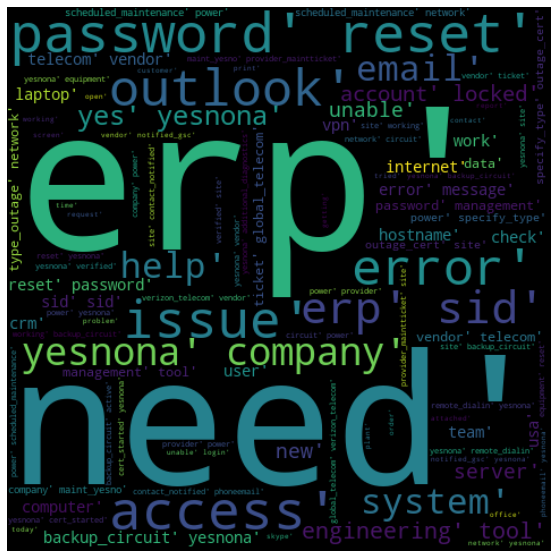

In [143]:
#check for the word count 100)
wordcloud_2 = WordCloud(width=480, height=480, max_words=100).generate(wordclouds)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [144]:
new_df = df_bk.copy()
new_df['words'] = data_words_bigrams
new_df

,Short description,Caller,Assignment group,RawDescription,English_Description,RawWordCount,cleaned_description,number_of_words,words
0,login issue,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,verified user detailsemployee manager name_x00...,29,verified user detailsemployee manager name d c...,23,"[verified, user, detailsemployee_manager, name..."
1,outlook,hmjdrvpb komuaywn,GRP_0,"_x000D_ _x000D_ _x000D_ hello team,_x000D_ _x...",_x000D__x000D_received from hmjdrvpbkomuaywngm...,23,d d hmjdrvpbkomuaywngmailcom d d team d d mee...,19,"[team, meetingsskype, meetings, etc, appearing..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,_x000D_ _x000D_ _x000D_ hi_x000D_ _x000D_ i c...,_x000D__x000D_received from eylqgodmybqkwiamgm...,9,d d eylqgodmybqkwiamgmailcom d d d d log vpn ...,11,"[log, vpn]"
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,5,unable access tool page,4,"[unable, access, tool, page]"
4,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,3,skype error,2,"[skype, error]"
...,...,...,...,...,...,...,...,...,...
8495,emails not coming in from zz mail,avglmrts vhqmtiua,GRP_29,"_x000D_ _x000D_ _x000D_ good afternoon,_x000D...",_x000D__x000D_received from avglmrtsvhqmtiuagm...,16,d d avglmrtsvhqmtiuagmailcom d d good afterno...,16,"[good_afternoon, receiving, emails, sent, mail..."
8496,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issue,telephony_software issue,2,telephony software issue,3,"[telephony_software, issue]"
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,vip2: windows password reset for tifpdchb pedx...,vip2 windows password reset for tifpdchb pedxruyf,7,vip windows password reset tifpdchb pedxruyf,6,"[vip, windows, password, reset, tifpdchb, pedx..."
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,Others,i am unable to access the machine utilities to...,i am unable to access the machine utilities to...,16,unable access macne utilities finish drawers a...,10,"[unable, access, macne, utilities, finish, dra..."


In [145]:
new_df['word_count']=new_df['cleaned_description'].apply(lambda x:len(str(x).split()))
new_df['char_counts']=new_df['cleaned_description'].apply(lambda x: char_counts(str(x)))
new_df['Digits_count']=new_df['cleaned_description'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))
new_df['Avg_word_Count']=new_df['word_count']/new_df['char_counts']

In [146]:
new_df.sample(100)

,Short description,Caller,Assignment group,RawDescription,English_Description,RawWordCount,cleaned_description,number_of_words,words,word_count,char_counts,Digits_count,Avg_word_Count
2701,account got locked,djkipmqo hjzeuwrd,GRP_0,account got locked,account got locked,3,account got locked,3,"[account, got, locked]",3,16,0,0.187500
6748,setup access for ethics,vfrdxtqw jfbmsenz,GRP_0,setup access for ethics,setup access for ethics,4,setup access etcs,3,"[setup, access, etcs]",3,15,0,0.200000
7158,"HostName_108: disk free on c:\ is now 15%, whi...",vbwszcqn nlbqsuyv,GRP_12,HostName_108: average (4 samples) disk free on...,HostName_108 average 4 samples disk free on c ...,24,hostname average samples disk free warning thr...,10,"[hostname, average_samples, disk_free, warning...",10,57,0,0.175439
4786,ethics issue,qcfmxgid jvxanwre,GRP_0,"hi liuytre,_x000D_ _x000D_ sorry to hear of th...",hi liuytre_x000D__x000D_sorry to hear of the i...,74,liuytre d d sorry hear issues etcs vpn experi...,38,"[liuytre, sorry, hear, issues, etcs, vpn, expe...",38,184,0,0.206522
4280,ethics issue.,fmzdkyqv dbrslnhe,Others,"_x000D_ _x000D_ _x000D_ hi,_x000D_ _x000D_ i ...",_x000D__x000D_received from fmzdkyqvdbrslnhegm...,17,d d fmzdkyqvdbrslnhegmailcom d d d d access b...,12,"[access, beec, module, message, correct]",12,60,0,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,erp SID_34 account unlock,wjsfbpuv lcpdfihr,GRP_0,erp SID_34 account unlock,erp SID_34 account unlock,4,erp sid account unlock,4,"[erp, sid, account, unlock]",4,19,0,0.210526
1158,rechner optiplex790 defekt \ ewew8323670 \xpug...,xpugntjv zcaermdt,GRP_24,rechner optiplex790 defekt \ ewew8323670 \xpug...,rechner optiplex790 defekt ewew8323670 xpugntj...,7,rechner optiplex defekt ewew xpugntjv zcaermdt,6,"[rechner, optiplex, defekt, ewew, xpugntjv, zc...",6,41,0,0.146341
7126,ç”µè„‘å¡ä¸”è¿žä¸ä¸Šå†…ç½‘,tuqrvowp fxmzkvqo,Others,ç”µè„‘å¡ä¸”è¿žä¸ä¸Šå†…ç½‘ï¼Œè¯·è½¬è´ºæ­£å¹...,received from tuqrvowpfxmzkvqogmailcomçµèåäèžä...,6,tuqrvowpfxmzkvqogmailcom tuqrvowp fxmzkvqo hu...,5,"[tuqrvowp, fxmzkvqo, human]",5,108,0,0.046296
5152,ess login issue,bcxfhekz bplfrnis,GRP_0,ess login issue_x000D_ -verified user details....,ess login issue_x000D_verified user detailsemp...,28,ess login issue d verified user detailsemploye...,25,"[ess, login, issue, verified, user, detailsemp...",25,125,0,0.200000


In [147]:

# Tokenizing the training and the test set
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
new_df['token_desc'] = new_df['cleaned_description'].apply(lambda x: tokenizer.tokenize(x))

In [148]:
new_df['token_desc'].head()

0    [verified, user, detailsemployee, manager, nam...
1    [d, d, hmjdrvpbkomuaywngmailcom, d, d, team, d...
2    [d, d, eylqgodmybqkwiamgmailcom, d, d, d, d, l...
3                         [unable, access, tool, page]
4                                       [skype, error]
Name: token_desc, dtype: object

In [149]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

new_df['token_desc'] = new_df['token_desc'].apply(lambda x : combine_text(x))

In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer

# word level tf-idf for ticket
tfidf = TfidfVectorizer(max_features=250, analyzer = 'word', min_df=2, max_df=0.95, ngram_range=(1, 2))
inc_tfidf = tfidf.fit_transform(new_df['token_desc'])

In [151]:
#  create a dictionary mapping the tokens to their tfidf values
tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

C:\Users\DELL\anaconda6\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [152]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(10)

,tfidf
password,3.099630
erp,3.143880
unable,3.279070
reset,3.304627
tool,3.328060
sid,3.452665
issue,3.466985
account,3.499561
user,3.526409
error,3.561014


In [153]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(10)

,tfidf
inwarehouse tool,5.744253
space,5.744253
center,5.626470
sid sid,5.612676
folder,5.612676
circuit yes,5.521109
login issue,5.521109
ist,5.521109
mobile,5.508686
microsoft,5.496416


In [154]:
array = inc_tfidf.todense()

# store the tf-idf array into pandas dataframe
df_inc = pd.DataFrame(array)
df_inc.head(10)

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0.190743,0.249143,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.608671,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.721195,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
df_inc['Assignment_group']= new_df['Assignment group']
df_inc['token_desc']= new_df['token_desc']

In [156]:
df_inc.head()

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,Assignment_group,token_desc
0,0.190743,0.249143,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0,verified user detailsemployee manager name d c...
1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0,d d hmjdrvpbkomuaywngmailcom d d team d d meet...
2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0,d d eylqgodmybqkwiamgmailcom d d d d log vpn d d
3,0.000000,0.000000,0.608671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0,unable access tool page
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0,skype error


In [157]:
df_inc_sample = df_inc[df_inc['Assignment_group'].map(df_inc['Assignment_group'].value_counts()) > 100]

In [158]:
df_inc_sample = new_df[new_df['Assignment group'].map(new_df['Assignment group'].value_counts()) > 100]

In [159]:
df_inc_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6890 entries, 0 to 8499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Short description    6882 non-null   object 
 1   Caller               6890 non-null   object 
 2   Assignment group     6890 non-null   object 
 3   RawDescription       6890 non-null   object 
 4   English_Description  6890 non-null   object 
 5   RawWordCount         6890 non-null   int64  
 6   cleaned_description  6890 non-null   object 
 7   number_of_words      6890 non-null   int64  
 8   words                6890 non-null   object 
 9   word_count           6890 non-null   int64  
 10  char_counts          6890 non-null   int64  
 11  Digits_count         6890 non-null   int64  
 12  Avg_word_Count       6890 non-null   float64
 13  token_desc           6890 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 807.4+ KB


In [160]:
X = df_inc_sample['token_desc']
y = df_inc_sample['Assignment group']

In [161]:
#X.to_csv('X.csv', index=False, encoding='utf_8_sig')

In [162]:
df_inc_sample.shape

(6890, 14)

In [163]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [164]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.25)

In [165]:
vectorizer = CountVectorizer(ngram_range = (1,2), stop_words=stopwords.words('english'), 
                             min_df = 0.05, max_df = 0.8, max_features = 100)

In [166]:
vectorizer

CountVectorizer(max_df=0.8, max_features=100, min_df=0.05, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [167]:
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)
X_train_dtm

<5167x19 sparse matrix of type '<class 'numpy.int64'>'
	with 8035 stored elements in Compressed Sparse Row format>

In [168]:
X_test

3476    nameuprmwlgb kirvecjalanguagebrowsermicrosoft ...
726                 erp sid erp production password reset
364                            need wireless mouse laptop
5667    connection workstation server uxhq normal prin...
6771                                    account locked ad
                              ...                        
7534                            unable reset password d d
6205    d close line item order number delivered remai...
5472                mobile device activation successfully
242                                windows password reset
8426    vmware tools running server hostname resided h...
Name: token_desc, Length: 1723, dtype: object

In [169]:
# check the vocabulary( First 15 features)
vectorizer.get_feature_names()[:10]

C:\Users\DELL\anaconda6\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['access',
 'account',
 'company',
 'erp',
 'error',
 'help',
 'issue',
 'login',
 'need',
 'outlook']

In [170]:
lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
ovr = OneVsRestClassifier(lr)

ovr.fit(X_train_dtm, y_train)
y_pred_ovr_test = ovr.predict(X_test_dtm)
y_pred_ovr_test

array([0, 0, 0, ..., 0, 0, 0])

In [171]:
ovr.fit(X_train_dtm, y_train)
pred = ovr.predict(X_test_dtm)
print(accuracy_score(y_test, pred))
linear_acc=accuracy_score(y_test,pred)

0.6105629715612304


In [172]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.61      0.99      0.75      1003
           1       0.50      0.02      0.04        51
           2       0.00      0.00      0.00        36
           3       0.40      0.09      0.14        23
           4       0.00      0.00      0.00        68
           5       0.78      0.15      0.25        48
           6       0.00      0.00      0.00        63
           7       0.33      0.04      0.07        26
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        18
          10       0.93      0.51      0.66        77
          11       0.35      0.02      0.04       272

    accuracy                           0.61      1723
   macro avg       0.32      0.15      0.16      1723
weighted avg       0.50      0.61      0.48      1723



C:\Users\DELL\anaconda6\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda6\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda6\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


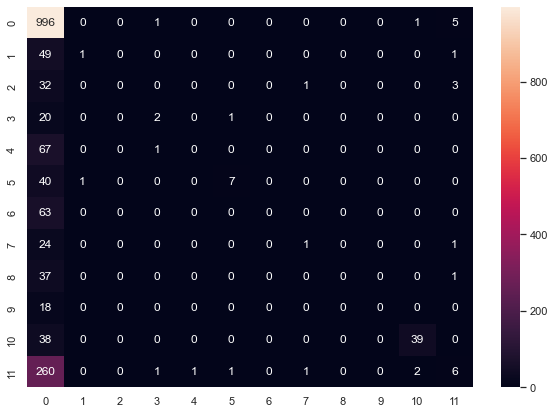

In [173]:
conf_mat = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 12)],
                  columns = [i for i in range(0, 12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

In [174]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(X_train_dtm, y_train)
pred = lsvc.predict(X_test_dtm)
print(accuracy_score(y_test, pred))
SVC_acc=accuracy_score(y_test,pred)
conf_mat = confusion_matrix(y_test, pred)
print(classification_report(y_test,pred))

0.6094022054556006
              precision    recall  f1-score   support

           0       0.60      0.99      0.75      1003
           1       0.00      0.00      0.00        51
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00        68
           5       0.78      0.15      0.25        48
           6       0.00      0.00      0.00        63
           7       0.33      0.04      0.07        26
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        18
          10       0.91      0.51      0.65        77
          11       0.40      0.02      0.04       272

    accuracy                           0.61      1723
   macro avg       0.25      0.14      0.15      1723
weighted avg       0.48      0.61      0.48      1723



C:\Users\DELL\anaconda6\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\DELL\anaconda6\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda6\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda6\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples

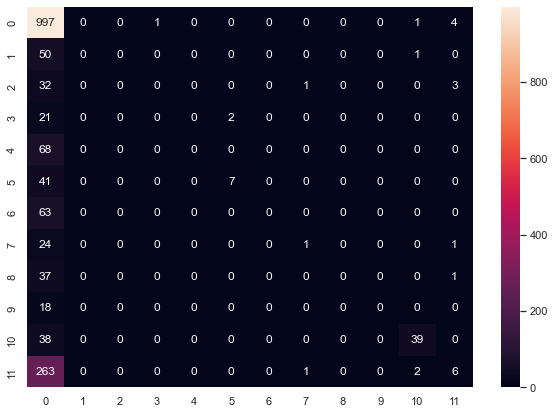

In [175]:
df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 12)],
                  columns = [i for i in range(0, 12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

In [176]:

from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=150, random_state=100, bootstrap=False)
rfcl = rfcl.fit(X_train_dtm, y_train)
pred_RF = rfcl.predict(X_test_dtm)
acc_RF = accuracy_score(y_test, pred_RF)
print(acc_RF)

0.5972141613464886


Bernoullis Classifier¶

In [177]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
clf = BernoulliNB()
clf.fit(X_train_dtm, y_train)
pred = clf.predict(X_test_dtm)
print(accuracy_score(y_test, pred))
ber_acc=accuracy_score(y_test,pred)
print(pred)

0.596053395240859
[0 0 0 ... 0 0 0]


In [178]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.60      0.97      0.74      1003
           1       0.00      0.00      0.00        51
           2       0.00      0.00      0.00        36
           3       0.50      0.09      0.15        23
           4       0.00      0.00      0.00        68
           5       0.29      0.17      0.21        48
           6       0.00      0.00      0.00        63
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        18
          10       0.95      0.51      0.66        77
          11       0.15      0.01      0.02       272

    accuracy                           0.60      1723
   macro avg       0.21      0.15      0.15      1723
weighted avg       0.43      0.60      0.47      1723



C:\Users\DELL\anaconda6\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda6\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda6\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


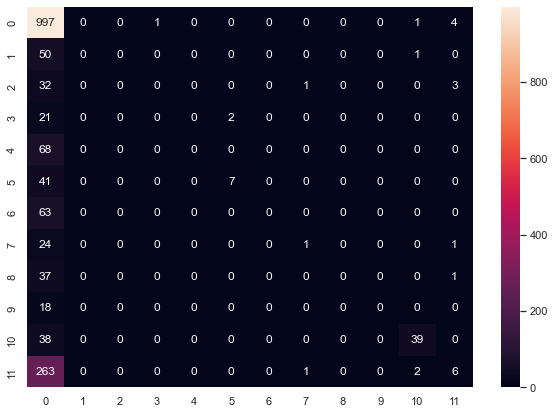

In [179]:
df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 12)],
                  columns = [i for i in range(0, 12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

In [180]:
df_comp = pd.DataFrame({'Classification Algorithm':['Logistic Regression', 'Linear SVC', 'RandomForest', 
                                                    'Bernoullis Classifier'],'Accuracy (%)':
                                              [linear_acc*100,SVC_acc*100,acc_RF*100,ber_acc*100]})

print("Following table shows comparison of the classification algorithms: ")
df_comp

Following table shows comparison of the classification algorithms: 


,Classification Algorithm,Accuracy (%)
0,Logistic Regression,61.056297
1,Linear SVC,60.940221
2,RandomForest,59.721416
3,Bernoullis Classifier,59.605340


In [181]:
from sklearn.model_selection import train_test_split
#X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.25)

In [197]:
#from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Input

import keras.models
import tensorflow
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
#from keras.utils.visualize_util import plot


In [198]:
#X_data = transformed_df["content"]

In [202]:
class LstmModel:
  model= Model()
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe
  
  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) # changed by Abraham
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def tokenizeAndEmbedding(self,dataframe):
    
    tokenizer,X = self.wordTokenizer(dataframe['token_desc'])
    y = np.asarray(dataframe['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def train(self, dataframe, batch_size, epochs):
   
    X,y = self.tokenizeAndEmbedding(dataframe)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
    model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
    return model_history

  def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
    
    input_layer = Input(shape=(maxlen,),dtype=tf.int64)
    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
    lstm=Bidirectional(LSTM(128))(embed)
    drop=Dropout(0.3)(lstm)
    dense =Dense(100,activation='relu')(drop)
    out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

    self.model = Model(input_layer,out)
    self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    self.model.summary()
    plot_model(self.model,to_file="LSTM_Model.jpg")

    #checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    #reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    #model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))
    model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs,validation_split=0.1, verbose=1) 
    return model_history,self.model

  def prediction(self):
      
     pred = self.model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy = metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",metrics.accuracy_score(self.y_test, pred))
     return accuracy

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()


In [203]:
maxlen = 300
numWords=9000
epochs = 10
embeddings_index = dict()

In [204]:
# Check how the LSTM Model perform with the cleansed data
lstmModelRawData = LstmModel()
lstmModelRawData_history, model = lstmModelRawData.train(df_inc_sample,100,epochs)
rawData_accuracy = lstmModelRawData.prediction()

Number of Samples: 6890
Number of Labels:  6890
Number of train Samples: 5512
Number of val Samples: 1378
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 300, 100)          900100    
                                                                 
 bidirectional_3 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               25700     
                                                                 
 dense_7 (Dense)   

UnimplementedError: Graph execution error:

Detected at node 'Cast_1' defined at (most recent call last):
    File "C:\Users\DELL\anaconda6\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\DELL\anaconda6\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\DELL\anaconda6\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\DELL\anaconda6\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\DELL\anaconda6\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 461, in dispatch_queue
      await self.process_one()
    File "C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 450, in process_one
      await dispatch(*args)
    File "C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 357, in dispatch_shell
      await result
    File "C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 652, in execute_request
      reply_content = await reply_content
    File "C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py", line 359, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 2768, in run_cell
      result = self._run_cell(
    File "C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 2814, in _run_cell
      return runner(coro)
    File "C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3012, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3191, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3251, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\DELL\AppData\Local\Temp\ipykernel_7240\1653421364.py", line 3, in <module>
      lstmModelRawData_history, model = lstmModelRawData.train(df_inc_sample,100,epochs)
    File "C:\Users\DELL\AppData\Local\Temp\ipykernel_7240\844135606.py", line 42, in train
      model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
    File "C:\Users\DELL\AppData\Local\Temp\ipykernel_7240\844135606.py", line 63, in fitModel
      model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs,validation_split=0.1, verbose=1)
    File "C:\Users\DELL\anaconda6\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DELL\anaconda6\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\DELL\anaconda6\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\Users\DELL\anaconda6\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\DELL\anaconda6\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\Users\DELL\anaconda6\lib\site-packages\keras\engine\training.py", line 864, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\DELL\anaconda6\lib\site-packages\keras\engine\training.py", line 957, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\DELL\anaconda6\lib\site-packages\keras\engine\compile_utils.py", line 459, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\DELL\anaconda6\lib\site-packages\keras\utils\metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\DELL\anaconda6\lib\site-packages\keras\metrics.py", line 178, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "C:\Users\DELL\anaconda6\lib\site-packages\keras\metrics.py", line 720, in update_state
      y_true = tf.cast(y_true, self._dtype)
Node: 'Cast_1'
Cast string to float is not supported
	 [[{{node Cast_1}}]] [Op:__inference_train_function_22633]

In [206]:
new_df.sample(5)

,Short description,Caller,Assignment group,RawDescription,English_Description,RawWordCount,cleaned_description,number_of_words,words,word_count,char_counts,Digits_count,Avg_word_Count,token_desc
2353,locked out of poruxnwb yfaqhceo,hwbukcsm hwobikcv,Others,"_x000D_ hi there,_x000D_ _x000D_ i tried chan...",received from hwbukcsmhwobikcvgmailcom_x000D__...,84,hwbukcsmhwobikcvgmailcom d d there d d tried ...,50,"[there, tried, changing, password, poruxnwb, y...",50,256,0,0.195312,hwbukcsmhwobikcvgmailcom d d there d d tried c...
5181,account unlock,pdvjanwx oprdiygs,GRP_0,account unlock,account unlock,2,account unlock,2,"[account, unlock]",2,13,0,0.153846,account unlock
5713,windows user id,ilbkhgxd hirsqytd,GRP_0,help desk please provide the windows user id...,received from ilbkhgxdhirsqytdgmailcomhelp des...,18,ilbkhgxdrsqytdgmailcomhelp desk provide windo...,9,"[desk, provide, windows, user, useruser, gb, y...",9,72,0,0.125000,ilbkhgxdrsqytdgmailcomhelp desk provide window...
8061,my symantec management agent is disabled,yvjdluhk hmcpvtdj,Others,my symantec management agent is disabled,my symantec management agent is disabled,6,symantec management agent disabled,4,"[symantec, management, agent, disabled]",4,31,0,0.129032,symantec management agent disabled
7247,"erp logon not possible after the error , multi...",mcytlpva jutxbdor,GRP_0,please see the error message attached,please see the error message attached,7,error message attached,3,"[error, message, attached]",3,20,0,0.150000,error message attached


In [214]:
vocab_size = 10000
batch_size = 32
epochs = 4
max_len = 25

#train_df = pd.read_csv('train.csv')
#test_df = pd.read_csv('test.csv')

def clean_text(text):
    text = re.sub(r'https?://\S+|www.\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    #text = text.lower()
    text = text.split()
    text = [word for word in text if not word in set(nltk.corpus.stopwords.words('english'))]
    text = ' '.join(text)
    return text

new_df['Cleaned_Description'] = new_df['cleaned_description'].apply(lambda x: clean_text(x))



In [216]:
new_df.info

<bound method DataFrame.info of                                       Short description             Caller  \
0                                           login issue  spxjnwir pjlcoqds   
1                                               outlook  hmjdrvpb komuaywn   
2                                    cant log in to vpn  eylqgodm ybqkwiam   
3                         unable to access hr_tool page  xbkucsvz gcpydteq   
4                                          skype error   owlgqjme qhcozdfx   
...                                                 ...                ...   
8495                  emails not coming in from zz mail  avglmrts vhqmtiua   
8496                           telephony_software issue  rbozivdq gmlhrtvp   
8497  vip2: windows password reset for tifpdchb pedx...  oybwdsgx oxyhwrfz   
8498                     machine nÃ£o estÃ¡ funcionando  ufawcgob aowhxjky   
8499  an mehreren pc`s lassen sich verschiedene prgr...  kqvbrspl jyzoklfx   

     Assignment group          

In [217]:
x_train, y_train = new_df.iloc[:, 14].values, new_df.iloc[:, 2].values

tokenizer = Tokenizer(num_words=vocab_size)

tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)
x_train_new = pad_sequences(sequences, maxlen=max_len)

model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(LSTM(128, dropout=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'RMSprop', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose = 1)

Epoch 1/4


ValueError: in user code:

    File "C:\Users\DELL\anaconda6\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\DELL\anaconda6\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\DELL\anaconda6\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\DELL\anaconda6\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\DELL\anaconda6\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\DELL\anaconda6\lib\site-packages\keras\engine\input_spec.py", line 214, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "lstm_4" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 128)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=string)
      • training=True
      • mask=None


In [ ]:

#pip install pydot

In [ ]:
vocab_size=20000
embedding_dim=14
max_length=200
trunc_type="post"
pad_type="post"
oov_tok="<OOV>"

In [2]:
embeddings_matrix = np.zeros((len(data_words)+1, embedding_dim))
for word, i in data_words.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector

NameError: name 'np' is not defined

In [3]:
model = Sequential()
model.add(Embedding(7411+1,embedding_dim, input_length=max_length, weights=[embeddings_matrix]))
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(128,return_sequences=True,recurrent_dropout = 0.5,dropout = 0.5)))
model.add(GlobalMaxPool1D())
model.add(Dense(32,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
model.summary()

NameError: name 'Sequential' is not defined

In [4]:
max_len = 50
input = Input(shape=(max_len,)) # Input layer
model = Embedding(input_dim = 1,  input_length=max_len)(input) # Word embedding layer
model = Dropout(0.1)(model) # Dropout
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model) # Bi-directional LSTM layer
out = TimeDistributed(Dense(14, activation="softmax"))(model)

NameError: name 'Input' is not defined

In [5]:
model = Sequential()
model.add(Dense(12, input_dim=1, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

NameError: name 'Sequential' is not defined

In [6]:
len(y)

NameError: name 'y' is not defined

In [7]:
model = Model(input, out) # Complete model

NameError: name 'Model' is not defined

In [8]:
y_train.shape

NameError: name 'y_train' is not defined

In [ ]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]) # Compile with an optimizer

In [9]:
history = model.fit(X_train, np.array(y_train), batch_size=32, epochs=3, validation_split=0.1, verbose=1) # Train

NameError: name 'model' is not defined

In [10]:
X = df_inc_sample['token_desc']
y = df_inc_sample['Assignment group']

NameError: name 'df_inc_sample' is not defined

In [11]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = nltk.word_tokenize(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_inc_sample['token_desc'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

NameError: name 'nltk' is not defined

In [12]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

In [13]:

#model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(13, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

NameError: name 'model' is not defined

# Ends Here

In [79]:
# Creating a function for wordcloud
def wordcloud_grp(f, x):
    wordclouds_0=' '.join(map(str, f))

    wc = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10, max_words=50).generate(wordclouds_0)
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most common 50 words of {}".format(x))
    plt.margins(x=0, y=0)
    plt.show()

In [77]:
#pip install plotly cufflinks
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [78]:
df['Assignment group'].iplot(
    kind='hist',
    xTitle='Assignment Group',
    yTitle='count',
    title='Assignment Group Distribution- Histogram (Fig-1)')

PlotlyRequestError: Authentication credentials were not provided.

In [ ]:

#pip install chart_studio

In [93]:
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 

sr = stopwords.words('english')
for i,text in enumerate(df['Description']):
  df['Description'][i]=" ".join(word for word in text.split(' ') if word not in sr)


import spacy
import en_core_web_sm

spacy.prefer_gpu()
nlp = en_core_web_sm.load()

#nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

df['Description'] = df['Description'].apply(lemmatize_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


ModuleNotFoundError: No module named 'en_core_web_sm'

In [2]:
import spacy
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

# Define a function to lemmatize the descriptions
def lemmatizer(sentence):
    # Parse the sentence using the loaded 'en' model object `nlp`
    doc = nlp(sentence)
    return " ".join([token.lemma_ for token in doc if token.lemma_ !='-PRON-'])
# Take an example of row# 43 Description and lemmatize it


OSError: [E050] Can't find model 'en_core_web_md'. It doesn't seem to be a Python package or a valid path to a data directory.